C:\Users\kudod\AppData\Local\Temp\ipykernel_3132\2195963135.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


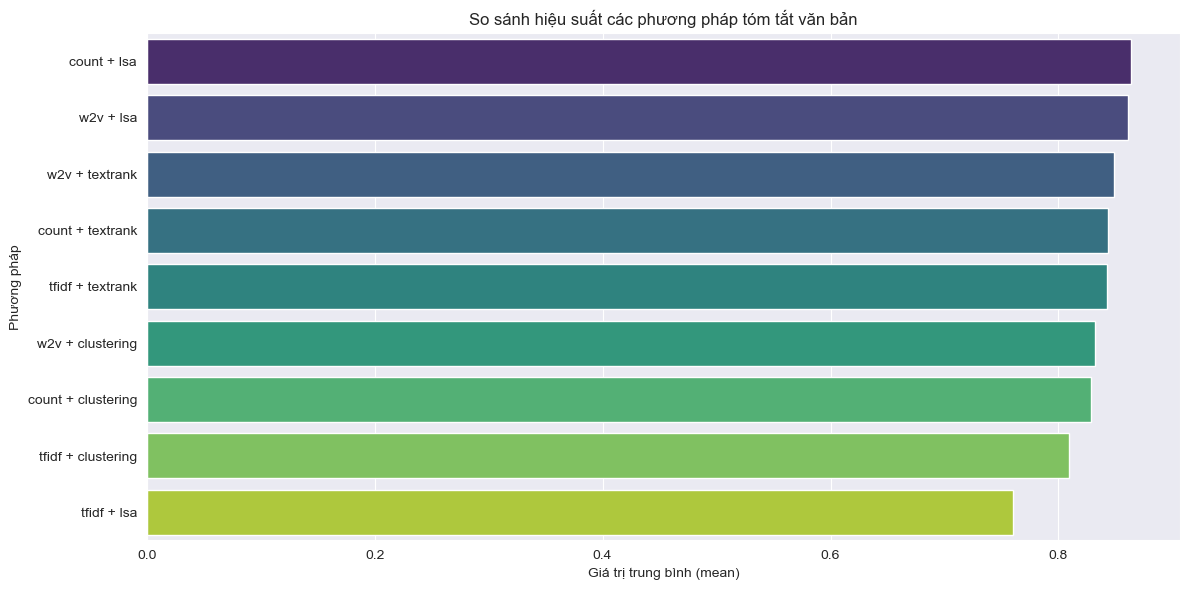

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc file Excel
# Correct way to specify the file path on Windows
file_path = r'D:\jetbrain\ideProject\PyProject\viet_summarizer\src\data\result.xlsx'
df = pd.read_excel(file_path)

# Tạo cột hiển thị tên phương pháp kết hợp
df["method combo"] = df["vectorize method"] + " + " + df["summarize method"]

# Vẽ biểu đồ cột ngang thể hiện giá trị trung bình (mean)
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df.sort_values("mean", ascending=False),
    x="mean",
    y="method combo",
    palette="viridis"
)

plt.xlabel("Giá trị trung bình (mean)")
plt.ylabel("Phương pháp")
plt.title("So sánh hiệu suất các phương pháp tóm tắt văn bản")
plt.tight_layout()
plt.show()


In [4]:
import os
from summary import Summarizer
from evaluate import Evaluate

testset_folder = r'D:\jetbrain\ideProject\PyProject\viet_summarizer\src\data\test_set\test'
summarizer = Summarizer()
evaluator = Evaluate()

methods = [
    ("Clustering", None),
    ("LSA", "lsa"),
    ("TextRank", "text rank")
]

results = []

for filename in os.listdir(testset_folder):
    if filename.endswith('.txt'):
        file_path = os.path.join(testset_folder, filename)
        with open(file_path, 'r', encoding='utf-8') as f:
            full_text = f.read()
        file_result = {"filename": filename}
        for method_name, mode in methods:
            if mode:
                summary, _ = summarizer.summarize(full_text, mode=mode)
            else:
                summary, _ = summarizer.summarize(full_text)
            score = evaluator.content_based(summary, full_text)
            file_result[method_name] = score
        results.append(file_result)

# Print results
for result in results:
    print(f"{result['filename']}:")
    for method_name, _ in methods:
        print(f"  {method_name}: {result[method_name]:.2f}")

PowerIterationFailedConvergence: (PowerIterationFailedConvergence(...), 'power iteration failed to converge within 100 iterations')